<a href="https://colab.research.google.com/github/brunogomesmkt/SKLearn---Classificacao/blob/main/Classificacao_de_carros_a_venda_em_um_site_Alura_by_Bruno_Gomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install graphviz==0.17
!apt-get install graphviz


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [17]:
import pandas as pd

In [18]:
dados = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv')
dados.head(4)

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no


**Renomerando as colunas para entender melhor**

In [19]:
a_renomear ={
    'mileage_per_year' : 'milhas_por_ano',
    'model_year' : 'ano_do_modelo', 
    'price' : 'preco',
    'sold' : 'vendido'
}
dados = dados.rename(columns=a_renomear)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


**Trocando os dados da coluna vendido do ('yes, no') inglês para números**

In [20]:
a_trocar = {
    'no' : 0,
    'yes' : 1
}
dados.vendido = dados.vendido.map(a_trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [21]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


**Transformando milhas em Km por ano**

In [22]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


**Excluindo colunas desnecessárias**

In [23]:
dados = dados.drop(columns=['Unnamed: 0','milhas_por_ano', 'ano_do_modelo'], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


**CLASSIFICAÇÃO DOS DADOS**

In [24]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


x = dados[['preco', 'idade_do_modelo', 'km_por_ano']]
y = dados['vendido']

#Treino dos Dados
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 5

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED, test_size = 0.25,
                                                        stratify = y)
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia fi %.2f%%' % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia fi 57.88%


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**[Novo teste usando Dummy e medindo a acurácia para verificar se é melhor do que a usada no SVC**

In [25]:
from sklearn.dummy import DummyClassifier
dummy_stratifield = DummyClassifier()

dummy_stratifield.fit(treino_x, treino_y)
previsoes = dummy_stratifield.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia do Dummy Stratifield foi %.2f%%' % acuracia)

A acurácia do Dummy Stratifield foi 51.24%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


**Novo teste usando Dummy Mostfrequent e medindo a acurácia para verificar se é melhor do que a usada no SVC**


In [33]:
from sklearn.dummy import DummyClassifier
dummy_mostfrequent = DummyClassifier()

dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia do Dummy Mostfrequent foi %.2f%%' % acuracia)

A acurácia do Dummy Mostfrequent foi 51.40%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


**Usando o Score**


In [34]:
from sklearn.dummy import DummyClassifier

dummy_stratifield = DummyClassifier()
dummy_stratifield.fit(treino_x, treino_y)
acuracia = dummy_stratifield.score(teste_x, teste_y) * 100

print('A acurácia do Dummy Stratifield foi %.2f%%' % acuracia)

A acurácia do Dummy Stratifield foi 50.84%


/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


**Usando o StandardScaler e o SVC 25% DE GANHO NA ACURÁCIA**

In [40]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                      test_size = 0.25,
                                                        stratify = y)
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % acuracia)

Treinaremos com 2500 elementos e testaremos com 2500 elementos
A acurácia foi 77.48%


**Usando o DecisionTreeClassifier**


In [55]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                      test_size = 0.25,
                                                        stratify = y)
print('Treinaremos com %d elementos e testaremos com %d elementos' % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia foi 76.84%


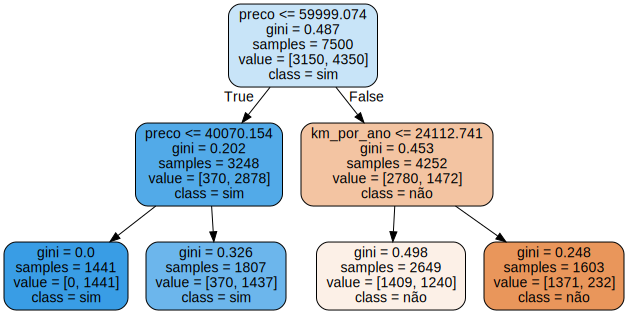

In [56]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                          class_names = ["não", "sim"])
grafico = graphviz.Source(dot_data)
grafico